In [1]:
#importing neccessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor



In [2]:
#Import data
df = pd.read_csv('temp.csv')
df.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [17]:
# Handle NaN values
df = df.dropna()
df.head(5)


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [19]:
# Data preprocessing
def feature_engineering(df):
    df = df.drop(["Date"], axis=1)
    return df

def preprocessing(df):
    df = feature_engineering(df)
    X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
    y_max = df["Next_Tmax"]
    y_min = df["Next_Tmin"]
    return X, y_max, y_min


In [20]:
#Train-test split
trainset, testset = train_test_split(df, random_state=0)
X_train, y_max_train, y_min_train = preprocessing(trainset)
X_test, y_max_test, y_min_test = preprocessing(testset)



In [21]:
# Modeling with SGDRegressor
reg_max = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg_min = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

reg_max.fit(X_train, y_max_train)
reg_min.fit(X_train, y_min_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [22]:
# Predictions
Next_Tmin_predict = reg_min.predict(X_test)
Next_Tmax_predict = reg_max.predict(X_test)


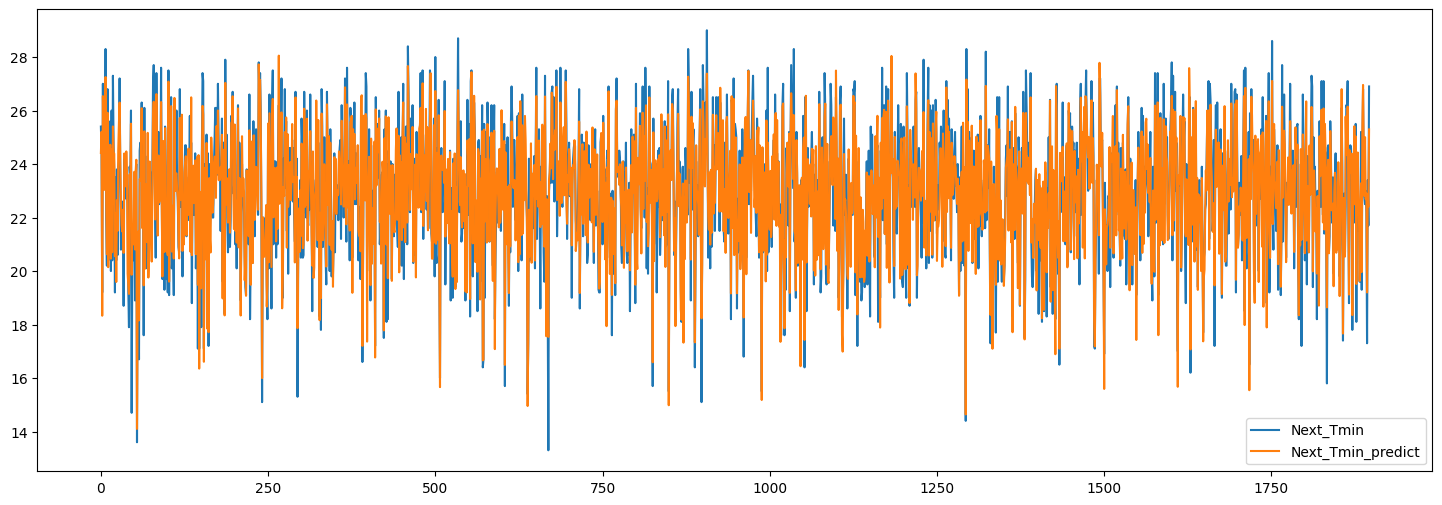

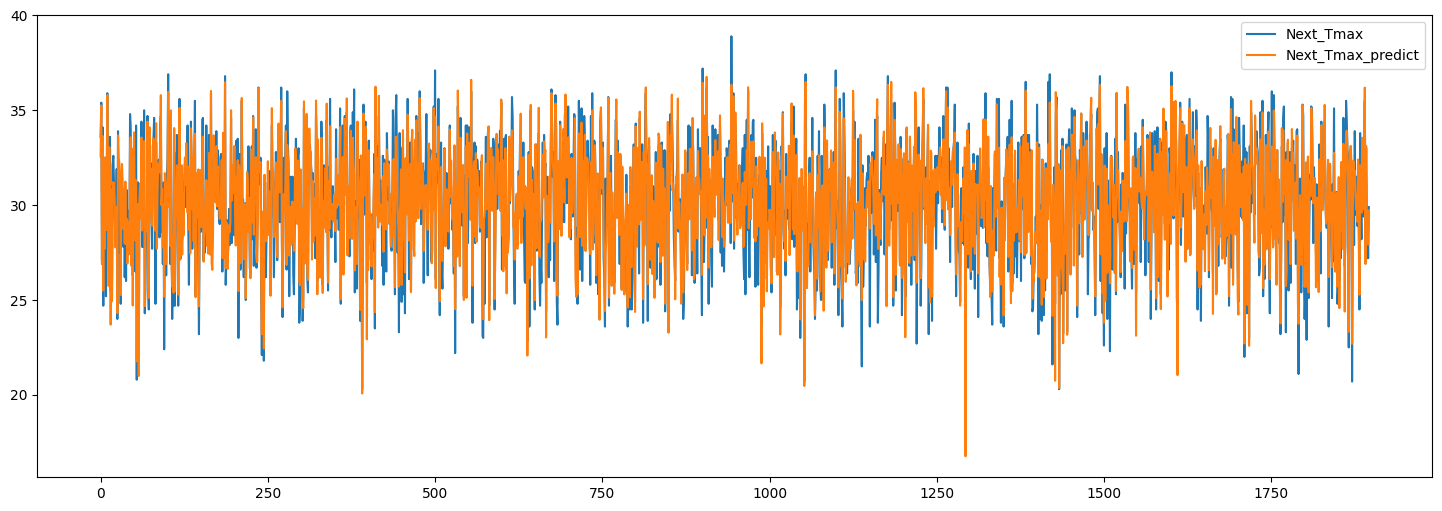

In [32]:

# Plot predictions
plt.figure(figsize=(18,6))
plt.plot(y_min_test.to_numpy(), label="Next_Tmin")
plt.plot(Next_Tmin_predict, label="Next_Tmin_predict")
plt.legend()
plt.show()

plt.figure(figsize=(18,6))
plt.plot(y_max_test.to_numpy(), label="Next_Tmax")
plt.plot(Next_Tmax_predict, label="Next_Tmax_predict")
plt.legend()
plt.show()


In [ ]:
#Explanation of the Optimized Code:
#Import Libraries: Essential libraries are imported for data handling, plotting, and modeling.
#Import Data: The dataset is read from a CSV file.
#Handle NaN Values: Rows with NaN values are dropped.
#Data Preprocessing: Functions for feature engineering and preprocessing are defined. Only the date column is dropped, and the dataset is split into features and targets.
#Train-Test Split: The data is split into training and testing sets.
#Modeling with SGDRegressor: Two pipelines are created for scaling the data and fitting an SGD regressor for Next_Tmax and Next_Tmin.
#Predictions: Predictions are made on the test set.
#Plot Predictions: The actual and predicted values are plotted for both Next_Tmax and Next_Tmin.